## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%config Completer.use_jedi = False

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [30]:
# Study results
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [31]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [49]:
len(mouse_metadata)


249

In [81]:
# Checking the number of mice.
mouse_count = combined_data["Mouse ID"].nunique()
mouse_count

249

In [87]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# pandas .locate any .duplicates using these 2 subsets (columns), where the Mouse ID is unique.
duplicate_mice_ID = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique
duplicate_mice_ID
# I was expecting it to show me the timepoint too.

<bound method Series.unique of 909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object>

In [85]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]
duplicate_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop(index=combined_data[combined_data['Mouse ID'] == 'g989'].index)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [98]:
# Checking the number of mice in the clean DataFrame.
clean_data['Mouse ID'].nunique()

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# reads : calculate the mean of this column grouped by this column 
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
mean
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
median
variance = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
variance
stand_dev = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
stand_dev
std_err = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()
std_err

# Assemble the resulting series into a single summary dataframe.

summary_stats = pd.DataFrame({"Tumor Volume Mean":mean,
                             "Tumor Volume Median":median,
                             "Tumor Volume Variance":variance,
                             "Tumor Volume Standard Deviation":stand_dev,
                             "Tumor Volume Standard Error":std_err})
summary_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [38]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [117]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
total_measurements_regimen = clean_data["Drug Regimen"].value_counts()

Text(0, 0.5, 'Total Measurements Taken')

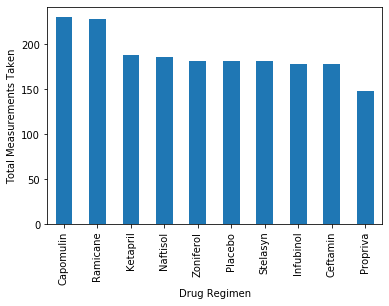

In [135]:
total_measurements_regimen.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

In [40]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


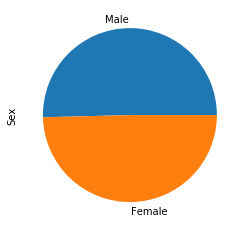

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
unique_list = clean_data.drop_duplicates('Mouse ID', keep='last')
mice_genders = unique_list["Sex"].value_counts()
mice_genders.plot(kind='pie')


In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [194]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
capomulin
ramicane = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane",:]
ramicane
infubinol = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol",:]
infubinol
ceftamin = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin",:]
ceftamin
# Start by getting the last (greatest) timepoint for each mouse
lastrow_per_mouse_capomulin = capomulin.drop_duplicates('Mouse ID', keep='last')
lastrow_per_mouse_ramicane = ramicane.drop_duplicates('Mouse ID', keep='last')
lastrow_per_mouse_infubinol = infubinol.drop_duplicates('Mouse ID', keep='last')
lastrow_per_mouse_ceftamin = ceftamin.drop_duplicates('Mouse ID', keep='last')

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# list of final results of each mouse within those 4 drug regimens including the last tumor volumes per mouse
union_merge_unique_mouse_id = pd.concat([lastrow_per_mouse_capomulin, lastrow_per_mouse_ramicane, lastrow_per_mouse_infubinol, lastrow_per_mouse_ceftamin])
union_merge_unique_mouse_id



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
...,...,...,...,...,...,...,...,...
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1773,x581,Ceftamin,Female,19,28,45,64.634949,3
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4


In [184]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_tumors = lastrow_per_mouse_capomulin["Tumor Volume (mm3)"]
capomulin_tumors

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Capomulin Tumors Quartile Data")
print("-------------------------------------")
print(f"The lower quartile of Tumor Volumes are: {lowerq}")
print(f"The upper quartile of Tumor Volumes are: {upperq}")
print(f"The interquartile range of Tumor Volumes are: {iqr}")
print(f"The the median of Tumor Volumes are: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin Tumors Quartile Data
-------------------------------------
The lower quartile of Tumor Volumes are: 32.37735684
The upper quartile of Tumor Volumes are: 40.1592203
The interquartile range of Tumor Volumes are: 7.781863460000004
The the median of Tumor Volumes are: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [188]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ceftamin_tumors = lastrow_per_mouse_ceftamin["Tumor Volume (mm3)"]

quartiles = ceframin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ceftamin Tumors Quartile Data")
print("-------------------------------------")
print(f"The lower quartile of Tumor Volumes are: {lowerq}")
print(f"The upper quartile of Tumor Volumes are: {upperq}")
print(f"The interquartile range of Tumor Volumes are: {iqr}")
print(f"The the median of Tumor Volumes are: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ceftamin Tumors Quartile Data
-------------------------------------
The lower quartile of Tumor Volumes are: 48.72207785
The upper quartile of Tumor Volumes are: 64.29983003
The interquartile range of Tumor Volumes are: 15.577752179999997
The the median of Tumor Volumes are: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [186]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
infubinol_tumors = lastrow_per_mouse_infubinol["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Infubinol Tumors Quartile Data")
print("-------------------------------------")
print(f"The lower quartile of Tumor Volumes are: {lowerq}")
print(f"The upper quartile of Tumor Volumes are: {upperq}")
print(f"The interquartile range of Tumor Volumes are: {iqr}")
print(f"The the median of Tumor Volumes are: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Infubinol Tumors Quartile Data
-------------------------------------
The lower quartile of Tumor Volumes are: 32.37735684
The upper quartile of Tumor Volumes are: 40.1592203
The interquartile range of Tumor Volumes are: 7.781863460000004
The the median of Tumor Volumes are: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [176]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ramicane_tumors = lastrow_per_mouse_ramicane["Tumor Volume (mm3)"]

quartiles = capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print("Ramicane Tumors Quartile Data")
print("-------------------------------------")
print(f"The lower quartile of Tumor Volumes are: {lowerq}")
print(f"The upper quartile of Tumor Volumes are: {upperq}")
print(f"The interquartile range of Tumor Volumes are: {iqr}")
print(f"The the median of Tumor Volumes are: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Ramicane Tumors Quartile Data
-------------------------------------
The lower quartile of Tumor Volumes are: 32.37735684
The upper quartile of Tumor Volumes are: 40.1592203
The interquartile range of Tumor Volumes are: 7.781863460000004
The the median of Tumor Volumes are: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


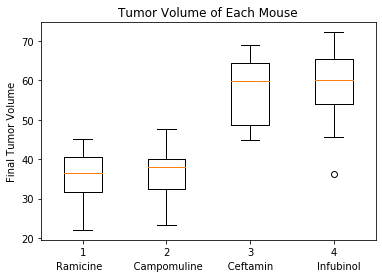

In [204]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = [ramicane_tumors, capomulin_tumors, ceftamin_tumors, infubinol_tumors]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Each Mouse')
ax1.set_ylabel('Final Tumor Volume')
ax1.set_xlabel("Ramicine          Campomuline        Ceftamin              Infubinol")
ax1.boxplot(boxplot)
plt.show()

## Line and Scatter Plots

In [209]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_s185_results = capomulin.loc[capomulin["Mouse ID"] == "s185"]
mouse_s185_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


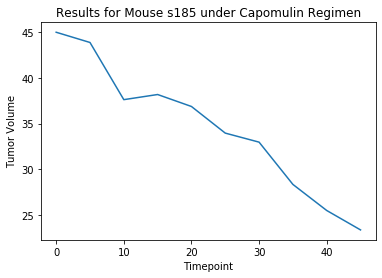

In [241]:
x_timepoints = mouse_s185_results ["Timepoint"]
y_tumor_volume = mouse_s185_results ["Tumor Volume (mm3)"]
plt.plot(x_timepoints, y_tumor_volume )

plt.title('Results for Mouse s185 under Capomulin Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

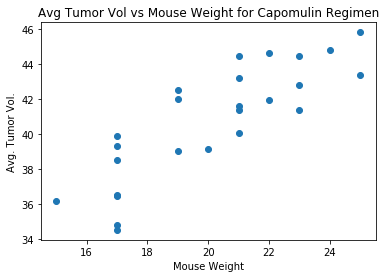

In [249]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

len(unique_list.loc[unique_list["Drug Regimen"] == "Capomulin",:])
# Capomulin treated 25 mouses so I should have 25 data points

var1 = capomulin.groupby(['Mouse ID']).mean()
var1

plt.scatter(var1['Weight (g)'],var1['Tumor Volume (mm3)'])

plt.title('Avg Tumor Vol vs Mouse Weight for Capomulin Regimen')
plt.xlabel('Mouse Weight')
plt.ylabel('Avg. Tumor Vol.')
plt.show()

## Correlation and Regression

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
